# Interactive notebook to display the effect of pointing or impact point

In [1]:
import pschitt.emission as em
import pschitt.vizualisation as viz
import pschitt.sky_objects as sky
import pschitt.geometry as geo
import pschitt.camera_image as ci
import numpy as np
import matplotlib.pyplot as plt
import math
import pschitt.dataset as ds
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [2]:
%matplotlib inline

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Setting up

In [4]:
shower = sky.shower()

shower.impact_point = np.array([600,600,0])

#shower direction
shower.alt = math.radians(70)
shower.az = math.radians(0)

#pointing direction off-axis
talt = math.radians(70)
taz = math.radians(0)

#shower parameters
shower_top = 12000
shower_length = 8000
shower_width = 200

shower.number_of_particles = int(1e3)

shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

tel_normal = geo.altaz_to_normal(talt,taz)
# tel1 = geo.Telescope([0,0,0],tel_normal)
# tel2 = geo.Telescope([200,0,0],tel_normal)
# tel3 = geo.Telescope([400,0,0],tel_normal)
# tel4 = geo.Telescope([800,0,0],tel_normal)
# tel5 = geo.Telescope([0,400,0],tel_normal)

# alltel = [tel1, tel2, tel3, tel4, tel5]

# alltel = geo.load_telescopes(ds.get('CTA_paranal.txt'), normal=tel_normal)
alltel = geo.load_telescopes('../share/arrays/CTA_paranal.txt', normal=geo.altaz_to_normal(talt, taz))
trigger_intensity = 20.
noise = 0

shower.particles_angular_emission_profile = em.angular_profile.lgdt06
shower.particles_angular_emission_profile_kwargs = {'eta':1}

ci.array_shower_imaging(shower, alltel, noise)

100 telescopes loaded


In [5]:
# alltel = geo.load_telescopes('../share/arrays/CTA_paranal.txt', normal=geo.altaz_to_normal(talt, taz))

In [6]:
@interact(i=widgets.IntSlider(min=0,max=len(alltel)-1,step=1,value=0))
def f(i):
    fig, ax = plt.subplots()
    ax = viz.display_camera_image(alltel[i], s=10, ax=ax);
    return ax

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

## Effect of altitude

In [14]:
shower_dict = {}
alltel = []

altitude = [65,67,70,72,75]
for alt in altitude:
    shower = sky.shower()

    shower.impact_point = np.array([50,0,0])

    #shower direction
    shower.alt = math.radians(alt)
    shower.az = math.radians(0)

    #pointing direction off-axis
    talt = math.radians(70)
    taz = math.radians(0)

    #shower parameters
    shower_top = 12000
    shower_length = 8000
    shower_width = 100

    shower.number_of_particles = int(1e4)

    shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

    tel_normal = geo.altaz_to_normal(talt,taz)
    tel = geo.Telescope([400,0,0], tel_normal)

    trigger_intensity = 20.
    noise = 0

    shower.particles_angular_emission_profile = em.angular_profile.lgdt06
    shower.particles_angular_emission_profile_kwargs = {'eta':0.1}

    ci.array_shower_imaging(shower, [tel], noise)
    
    alltel.append(tel)

    
    
@interact(i=widgets.IntSlider(min=0,max=len(alltel)-1,step=1,value=0))
def f(i): 
    ax = viz.display_camera_image(alltel[i], s=10);
    ax.set_title("Shower altitude = {}".format(altitude[i]));

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

## Effect of shower azimuth

In [33]:
shower_dict = {}
alltel = []

azimuth = [65,67,70,72,75]
for az in azimuth:
    shower = sky.shower()

    shower.impact_point = np.array([50,0,0])

    #shower direction
    shower.alt = math.radians(-40)
    shower.az = math.radians(az)

    #pointing direction off-axis
    talt = math.radians(-40)
    taz = math.radians(70)

    #shower parameters
    shower_top = 12000
    shower_length = 8000
    shower_width = 100

    shower.number_of_particles = int(5e4)

    shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

    tel_normal = geo.altaz_to_normal(talt,taz)
    tel = geo.Telescope([400,0,0], tel_normal)

    trigger_intensity = 20.
    noise = 0

    shower.particles_angular_emission_profile = em.angular_profile.lgdt06
    shower.particles_angular_emission_profile_kwargs = {'eta':0.1}

    ci.array_shower_imaging(shower, [tel], noise)
    
    alltel.append(tel)


@interact(i=widgets.IntSlider(min=0,max=len(alltel)-1,step=1,value=0))
def f(i):
    ax = viz.display_camera_image(alltel[i], s=10);
    ax.set_title("Shower azimuth = {}".format(azimuth[i]))

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

## Effect of impact point

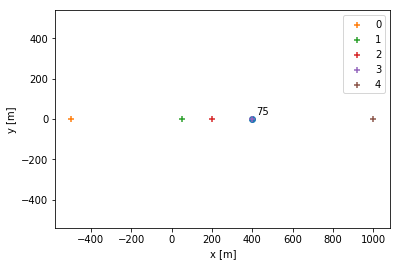

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

In [34]:
shower_dict = {}
alltel = []

impact_x = [-500,50,200,400,1000]
for x in impact_x:
    shower = sky.shower()

    shower.impact_point = np.array([x,0,0])

    #shower direction
    shower.alt = math.radians(40)
    shower.az = math.radians(70)

    #pointing direction off-axis
    talt = math.radians(40)
    taz = math.radians(70)

    #shower parameters
    shower_top = 12000
    shower_length = 8000
    shower_width = 100

    shower.number_of_particles = int(4e4)

    shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

    tel_normal = geo.altaz_to_normal(talt,taz)
    tel = geo.Telescope([400,0,0], tel_normal)

    trigger_intensity = 20.
    noise = 0

    shower.particles_angular_emission_profile = em.angular_profile.lgdt06
    shower.particles_angular_emission_profile_kwargs = {'eta':0.1}

    ci.array_shower_imaging(shower, [tel], noise)
    
    alltel.append(tel)
    
ax = viz.plot_array([tel])
for i, x in enumerate(impact_x):
    ax.scatter(x, 0, label=i, marker='+')
ax.legend()

@interact(i=widgets.IntSlider(min=0,max=len(alltel)-1,step=1,value=0))
def f(i):
    ax = viz.display_camera_image(alltel[i], s=10);
    ax.set_title("Impact point X value = {}".format(impact_x[i]))

## Effect of impact point Y-value

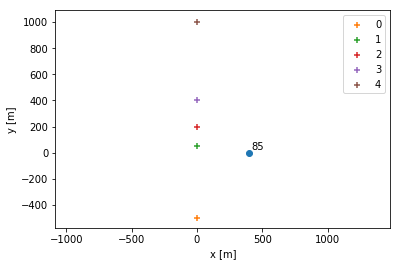

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

In [36]:
shower_dict = {}
alltel = []

impact_y = [-500,50,200,400,1000]
for y in impact_y:
    shower = sky.shower()

    shower.impact_point = np.array([200,y,0])

    #shower direction
    shower.alt = math.radians(50)
    shower.az = math.radians(0)

    #pointing direction off-axis
    talt = math.radians(50)
    taz = math.radians(0)

    #shower parameters
    shower_top = 12000
    shower_length = 8000
    shower_width = 100

    shower.number_of_particles = int(4e4)

    shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

    tel_normal = geo.altaz_to_normal(talt,taz)
    tel = geo.Telescope([400,0,0], tel_normal)

    trigger_intensity = 20.
    noise = 0

    shower.particles_angular_emission_profile = em.angular_profile.lgdt06
    shower.particles_angular_emission_profile_kwargs = {'eta':0.1}

    ci.array_shower_imaging(shower, [tel], noise)
    
    alltel.append(tel)

ax = viz.plot_array([tel])
for i, y in enumerate(impact_y):
    ax.scatter(0, y, label=i, marker='+')
ax.legend()
@interact(i=widgets.IntSlider(min=0,max=len(alltel)-1,step=1,value=0))
def f(i):
    ax = viz.display_camera_image(alltel[i], s=12);
    ax.set_title("Impact point X value = {}".format(impact_x[i]))

In [81]:
tel.mirror_center

array([-20.,  65.,  16.])

In [12]:
import bokeh
from bokeh.io import output_notebook
from bokeh import plotting
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, ColorBar
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

In [10]:
output_notebook()

Loading BokehJS ...

In [110]:
plot = plotting.figure(plot_height=400, plot_width=400,
              match_aspect=True)

In [114]:
tel = alltel[10]
x = tel.pixel_tab[:,0]
y = tel.pixel_tab[:,1]
signal = tel.signal_hist

In [115]:
plot = plotting.figure(plot_height=400, plot_width=400,
              match_aspect=True)

source = ColumnDataSource(dict(x=x,y=y,signal=signal))

mapper = linear_cmap(field_name='signal', palette=Spectral6, low=min(signal), high=max(signal))
plot.circle(x='x', y='y', color=mapper, fill_alpha=1, size=6, source=source)

bokeh.models.renderers.GlyphRenderer(
    id='f0015b4e-2d39-4c2f-85c5-1d5aafa75f4a',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='6bd71010-e874-463e-a209-6ad198126956',
        callback=None,
        data={'signal': {'__ndarray__': 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [116]:
show(plot)

In [13]:
tel_id = 10
tel = alltel[tel_id]
x = tel.pixel_tab[:,0]
y = tel.pixel_tab[:,1]
signal = tel.signal_hist 


plot = plotting.figure(plot_height=400, plot_width=400,
              match_aspect=True)

mapper = linear_cmap(field_name='y', palette=Spectral6, low=min(signal), high=max(signal))
r = plot.circle(x, y, fill_alpha=1, size=6)


def update(tel_id):
    tel = alltel[tel_id]
    x = tel.pixel_tab[:,0]
    y = tel.pixel_tab[:,1]
    signal = tel.signal_hist
    
    r.data_source.data['x'] = x
    r.data_source.data['y'] = y


show(plot, notebook_handle=True)

interact(update, tel_id=(0, len(alltel)-1, 1))

interactive(children=(IntSlider(value=49, description='tel_id', max=99), Output()), _dom_classes=('widget-inte…

<function __main__.update>

In [14]:
r.data_source.data

{'x': array([-0.1022, -0.0958, -0.0894, ...,  0.0894,  0.0958,  0.1022]),
 'y': array([ 0.1554,  0.1554,  0.1554, ..., -0.1554, -0.1554, -0.1554])}

In [19]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

tel_id = 0
x = alltel[tel_id].pixel_tab[:,0]
y = alltel[tel_id].pixel_tab[:,1]

source = ColumnDataSource(dict(x=x,y=y,signal=signal))
mapper = linear_cmap(field_name='signal', palette=Spectral6, low=min(signal), high=max(signal))
p = figure(title="Camera", plot_height=300, plot_width=600, match_aspect=True)
r = p.circle(x='x', y='y', fill_alpha=1, size=6, color=mapper, source=source)
# r = p.line(x, y, color="#2222aa", line_width=3)

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    source = ColumnDataSource(dict(x=alltel[w].pixel_tab[:,0],
                                   y=alltel[w].pixel_tab[:,1],
                                   signal=alltel[w].signal_hist))
    mapper = linear_cmap(field_name='signal', palette=Spectral6, low=min(signal), high=max(signal))

    r.data_source.data['x'] = alltel[w].pixel_tab[:,0]
    r.data_source.data['y'] = alltel[w].pixel_tab[:,1] #A * func(w * x + phi)
    push_notebook()
    
show(p, notebook_handle=True)

interact(update, f=["sin", "cos", "tan"], w=(0,99), A=(1,5), phi=(0, 20, 0.1))

Loading BokehJS ...

interactive(children=(Dropdown(description='f', options=('sin', 'cos', 'tan'), value='sin'), IntSlider(value=1…

<function __main__.update>

In [ ]:
factors = data.Genre.unique().tolist()
colors = ["red","green","blue","black","orange","brown","grey","purple","yellow","cyan","pink","peru"]
color_mapper = CategoricalColorMapper(factors=factors,palette=colors)

# hover tool
hover = HoverTool(tooltips = [("Genre of game","@Genre"),("Publisher of game","@Publisher"),("Platform of game","@Platform")])

# plotting
plot=figure(title ="Video Game Sales",tools=[hover,"crosshair","pan","box_zoom"])
plot.circle("x","y",source=source,color=dict(field="Genre", transform=color_mapper), legend='Genre',hover_color ="red")